In [1]:
#IMPORTING REQUIRED LIBRARIES
from sklearn.model_selection  import train_test_split
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.preprocessing    import MinMaxScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection  import KFold
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import cross_val_predict
from sklearn                  import metrics
from sklearn.metrics          import precision_score ,confusion_matrix, recall_score ,precision_recall_curve,PrecisionRecallDisplay,f1_score
from sklearn.metrics          import roc_curve , RocCurveDisplay , roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


In [2]:
#IMPORTING DATA
df = pd.read_csv("data.csv" , index_col = 0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#columns such as location and country should be categorized in values ranged from 0 to 8 
#while age to be categorized from 0 to 2 which will help us in the next step
#which is: onehot encoding
newLocation = pd.cut(df.location, bins=8 , labels=np.arange(8), right=False)
df['location'] = newLocation

newCountry = pd.cut(df.country, bins=8 , labels=np.arange(8), right=False)
df['country'] = newCountry

newAge = pd.cut(df.age, bins=3, labels=np.arange(3), right=False)
df['age'] = newAge

df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,6,1,1,2,1,0,14,31,19,12,3,1,8,1
1,5,1,0,1,0,1,14,31,19,12,3,1,0,0
2,7,1,1,1,0,1,14,31,19,12,3,1,13,0
3,6,1,0,1,1,0,14,31,19,12,3,1,0,0
4,6,1,1,1,0,0,14,31,19,12,3,1,0,0


In [4]:
#One-Hot_encoding implementation by converting the data first to label encoding 
#and then transform it to be one hot encoded

#Location encoding
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
ohe1 = OneHotEncoder(sparse=False)
df[['L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7'  ]] = ohe1.fit_transform(df['location'].values.reshape(-1,1))

#Country encoding
label_encoderC = LabelEncoder()
df['country'] = label_encoderC.fit_transform(df['country'])
ohe2 = OneHotEncoder(sparse=False)
df[['C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7' ]] = ohe2.fit_transform(df['country'].values.reshape(-1,1))

#gender encoding
label_encoderG = LabelEncoder()
df['gender'] = label_encoderG.fit_transform(df['gender'])
ohe3 = OneHotEncoder(sparse=False)
df[['Male','Female', 'Undefined']] = ohe3.fit_transform(df['gender'].values.reshape(-1,1))

df = df.drop("location", axis=1)
df = df.drop("country", axis=1)
df = df.drop("gender", axis=1)

df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C1,C2,C3,C4,C5,C6,C7,Male,Female,Undefined
0,2,1,0,14,31,19,12,3,1,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,14,31,19,12,3,1,13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#Reordering the columns
df = df[['age', 'vis_wuhan', 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3' , 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos' ,'L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7' ,  'C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7'  ,'Male','Female' ,'Undefined' , 'result']]
X = df.iloc[:,0:29].values
Y = df.iloc[:,29:30].values
df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [6]:
# Nomralization of data which is a way to improve the accuracy of the models
scaler = MinMaxScaler()
nX = scaler.fit_transform(X)
nY = scaler.fit_transform(Y)

df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [7]:
#First step of cross-validation: splitting the data into folds, number of folds is recommended to be 10
fold = KFold(n_splits=10, shuffle=False)
print(fold)

KFold(n_splits=10, random_state=None, shuffle=False)


In [8]:
log_reg = LogisticRegression()

In [9]:
#Hyperparameter tuning to get the best estimator
param_grid = [    
    {'penalty' : ['l2', 'none'], ##specifying the norm of the penalty where l2 penalty norm is the default, none is no penalty added. 
    'C' : [100, 10, 1.0, 0.1, 0.01], ##positive float which is the inverse of the reguralrization strength, (The smaller value The stronger regurlization).
    'solver' : ['newton-cg', 'lbfgs'], ##specifying algorithm to use in optimization, lbfgs is the default and newton-cg is for multiclass problems.
    'max_iter' : [100, 1000,2500, 5000] ## Max number of iterations taken for the solvers to converge.
    }
]

In [11]:
grid = GridSearchCV(log_reg, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
best_clf = grid.fit(nX,nY.ravel())

Fitting 4 folds for each of 80 candidates, totalling 320 fits


In [12]:
best_clf.best_estimator_

LogisticRegression(solver='newton-cg')

In [13]:
#accuracy calculation for each Fold
scores = cross_val_score(best_clf.best_estimator_, nX, nY.ravel(), cv=10, scoring='accuracy')
for i in range(10):
    print(scores[i] , "\n")


0.9425287356321839 

0.9310344827586207 

0.9195402298850575 

0.8953488372093024 

0.8837209302325582 

0.8837209302325582 

0.9651162790697675 

0.9651162790697675 

0.9651162790697675 

0.9418604651162791 



In [14]:
scores.mean()

0.9293103448275863

In [15]:
best_clf.best_estimator_.fit(nX,nY.ravel())

LogisticRegression(solver='newton-cg')

In [16]:
y_pred= cross_val_predict(best_clf.best_estimator_,nX,nY.ravel(), cv = 10)

# Precison, Recall and AUC calculation/Plot

In [17]:
precisions, recalls, thresholds= precision_recall_curve(nY, y_pred)

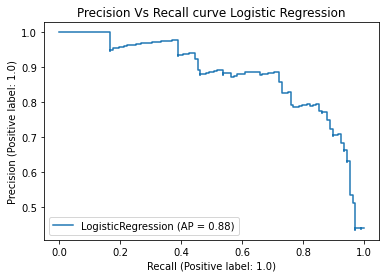

In [18]:
display = PrecisionRecallDisplay.from_estimator(best_clf.best_estimator_,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve Logistic Regression")

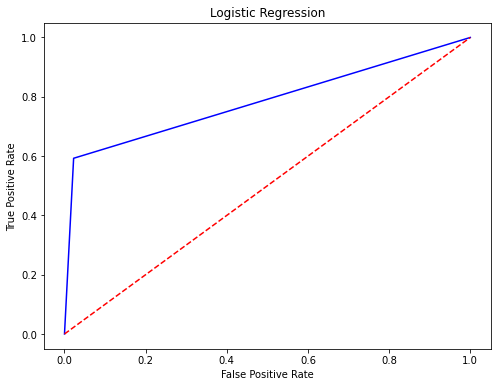

In [19]:
fpr_log, tpr_log, threshold_log = roc_curve(nY, y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [20]:
#Area under curve 
#where the larger the AUC, The better performance of the model
AUC = roc_auc_score(nY, y_pred)
AUC

0.7850380181506009

In [21]:
print(precisions)
print(recalls)
print(thresholds)

[0.12514484 0.79012346 1.        ]
[1.         0.59259259 0.        ]
[0. 1.]
